In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

df = pd.read_csv('Heart Attack Analysis & Prediction Dataset.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.output.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y  = df.values[:, :-1], df.values[:,-1].astype(int)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, #1/3, 
    random_state=42
)
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf = make_pipeline(clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name, score)
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(name, score)
    y_pred = clf.predict(X_test)
    print(precision_recall_fscore_support(y_test, y_pred, average='binary'))
    #print(confusion_matrix(y_test, y_pred))

(303, 13) (303,)
Nearest Neighbors 0.6557377049180327
Linear SVM 0.8688524590163934
RBF SVM 0.5245901639344263
Gaussian Process 0.6065573770491803
Decision Tree 0.819672131147541
Random Forest 0.8688524590163934
Neural Net 0.8852459016393442
AdaBoost 0.819672131147541
Naive Bayes 0.8688524590163934
QDA 0.8360655737704918
Nearest Neighbors 0.8524590163934426
(0.9259259259259259, 0.78125, 0.847457627118644, None)
Linear SVM 0.8852459016393442
(0.8787878787878788, 0.90625, 0.8923076923076922, None)
RBF SVM 0.5409836065573771
(0.5333333333333333, 1.0, 0.6956521739130436, None)
Gaussian Process 0.8688524590163934
(0.875, 0.875, 0.875, None)
Decision Tree 0.819672131147541
(0.8181818181818182, 0.84375, 0.8307692307692308, None)
Random Forest 0.8688524590163934
(0.875, 0.875, 0.875, None)
Neural Net 0.8688524590163934
(0.875, 0.875, 0.875, None)
AdaBoost 0.819672131147541
(0.8888888888888888, 0.75, 0.8135593220338982, None)
Naive Bayes 0.8688524590163934
(0.9, 0.84375, 0.870967741935484, None

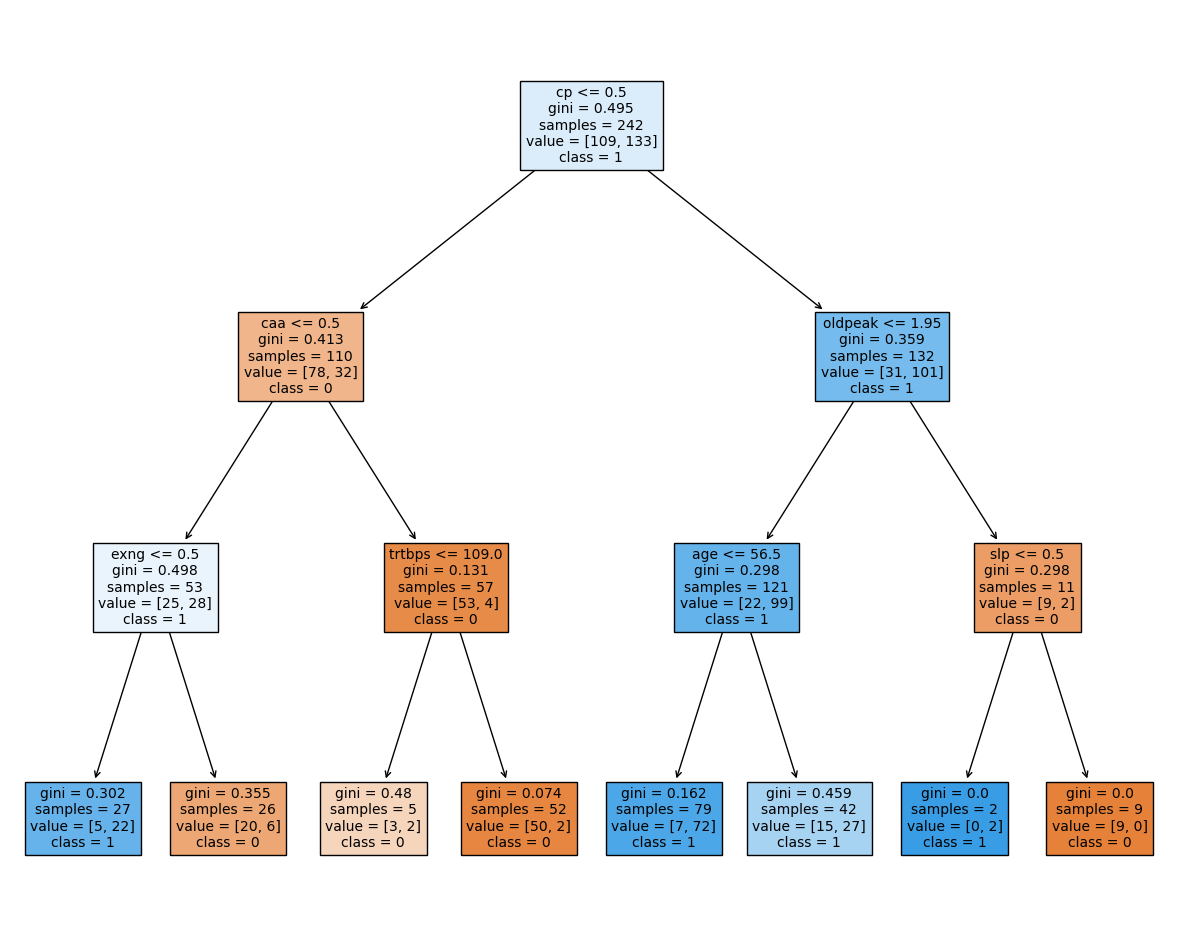

In [33]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
plt.figure(figsize=(15,12))
tree.plot_tree(clf, feature_names=df.columns.tolist(),
              filled=True,
              class_names=['0','1'],
              fontsize=10)
plt.show()

In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')